# Introduction to wavelet analysis

## Why not use Fourier analysis?

Although Fourier analysis is well suited to analyze constant periodic components in time series, it cannot characterize signals whose frequency content changes with time. So, a Fourier decomposition may give all spectral components of a signal, but it does not provide any information when they are present.

In [1]:
library("WaveletComp");

In [2]:
library("fields");

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid

Attaching package: ‘grid’

The following object is masked from ‘package:WaveletComp’:

    arrow

Spam version 2.6-0 (2020-12-14) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 


In [ ]:
x = periodic.series(start.period = 50, length = 1000)
x = x + 0.2*rnorm(1000)  # add some noise

# plot the time series
plot(x, type="l")

## Power spectrum

The power spectrum is used to examine the main characteristics of a time series. For example, it can be used to detect if seasonality is present in the data, if so, the spectrum will show peaks at the seasonal frequencies.

The power spectrum $S_{xx}$ of a time series $x(t)$ can be used to describe the distribution of power in frequency space.

Using fourier analysis we can decompose any physical signal into a spectrum of frequencies.

So:

$$ E = \int_{-\infty}^{\infty} | x (t) |^2 dt$$

$$\int_{-\infty}^{\infty} | x (t) |^2 dt = \int_{-\infty}^{\infty} | \hat{x} (f) |^2 df$$

where $$ \hat{x} (f) = \int_{-\infty}^{\infty} e^{-2\pi i f t} x(t) dt$$

$$ S_{xx} (f) = | \hat{x} (f) |^2 $$

`Tip`: Fourier transformations in R can be applied with:

```R
fft()
```

**Task**: Complete the following function by filling out the empty lines, using the information from above.

In [3]:
power_spectrum <- function(x)
    {
    x.fft <- fft(x)# ADD HERE
    sym.x <- floor(length(x.fft)/2) # Symetric part of fft
    range <- seq(1, sym.x, 1)
    x.fft <- x.fft[range]
    x.fft.power <- abs(x.fft)**2 # ADD HERE
    freq <- 0:(length(x.fft)-1) * 1 / length(x.fft) / 2 
    our.own.power <- list("freq" = freq, "power" = x.fft.power)
    return(our.own.power)
}

In [4]:
a <- power_spectrum(x)
plot(1/a$freq, a$power,xlim=c(0,100), type = "l")

ERROR: Error in fft(x): object 'x' not found


Of course someone already implemented this in R.

In [5]:
x.spec <- spec.pgram(x,plot = FALSE)
plot(1/x.spec$freq, x.spec$spec, type = "l", xlim = c(0,100))

ERROR: Error in as.ts(x): object 'x' not found


## Why do we need time information about our time series?

In [6]:
x1 <- periodic.series(start.period = 90, length = 500)
x2 <- 1.2*periodic.series(start.period = 40, length = 500)
x <- c(x1, x2) + 0.3*rnorm(1000)

y1 <- periodic.series(start.period = 90, length = 1000)
y2 <- 1.2*periodic.series(start.period = 40, length = 1000)
y <- (y1 + y2)/2  + 0.3*rnorm(1000)

**Task**: Plot and compare these two time series:

use `par()` and `plot()`

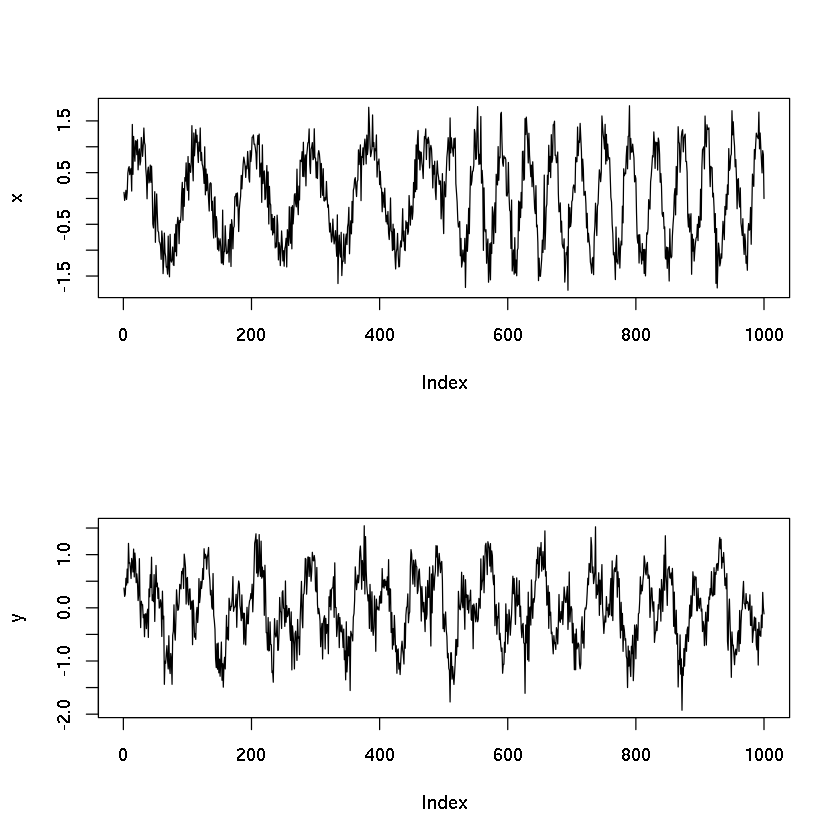

In [7]:
par(mfrow=c(2,1))    # set the plotting area into a 2*1 array

plot(x, type = "l")
plot(y, type = "l")

**Task**: Compute the power spectrum of `x` and `y` by using the function `spec.pgram(<your data>, plot = FALSE)`

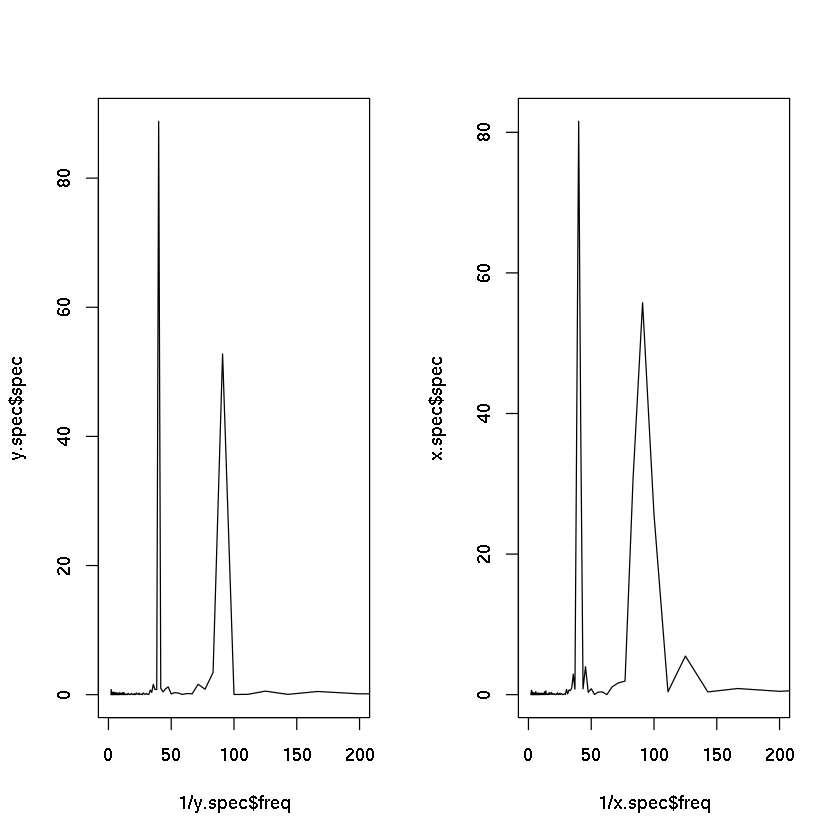

In [8]:
# ADD HERE
x.spec <- spec.pgram(x, plot=FALSE)
y.spec <- spec.pgram(y, plot=FALSE)


par(mfrow=c(1,2))    # set the plotting area into a 2*1 array

# 
plot(1/y.spec$freq, y.spec$spec, type = "l", xlim=c(0, 200))
plot(1/x.spec$freq, x.spec$spec, type = "l", xlim=c(0, 200))

## Finally, wavelets ...

In [9]:
my.data <- data.frame(x = x)
my.w.x <- analyze.wavelet(my.data, "x", loess.span = 0,
                        dt = 1, dj = 1/250,lowerPeriod = 16,
                        upperPeriod = 128,make.pval = TRUE, n.sim = 10)


my.data <- data.frame(x = y)
my.w.y <- analyze.wavelet(my.data, "x", loess.span = 0,
                        dt = 1, dj = 1/250,lowerPeriod = 16,
                        upperPeriod = 128,make.pval = TRUE, n.sim = 10)

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


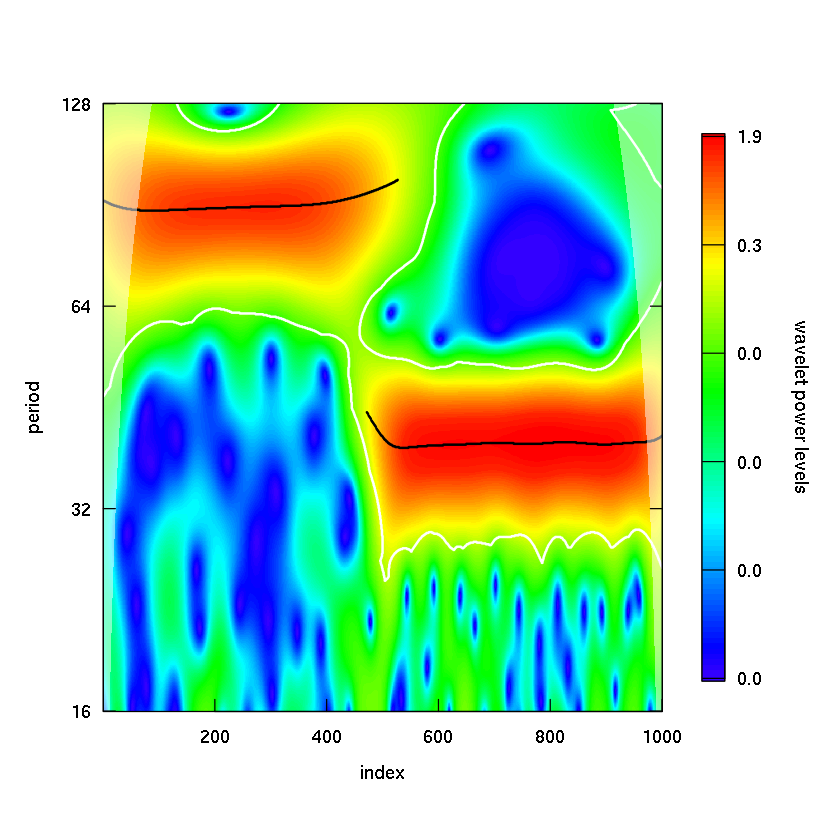

In [10]:
wt.image(my.w.x, n.levels = 100,legend.params = list(lab = "wavelet power levels"))

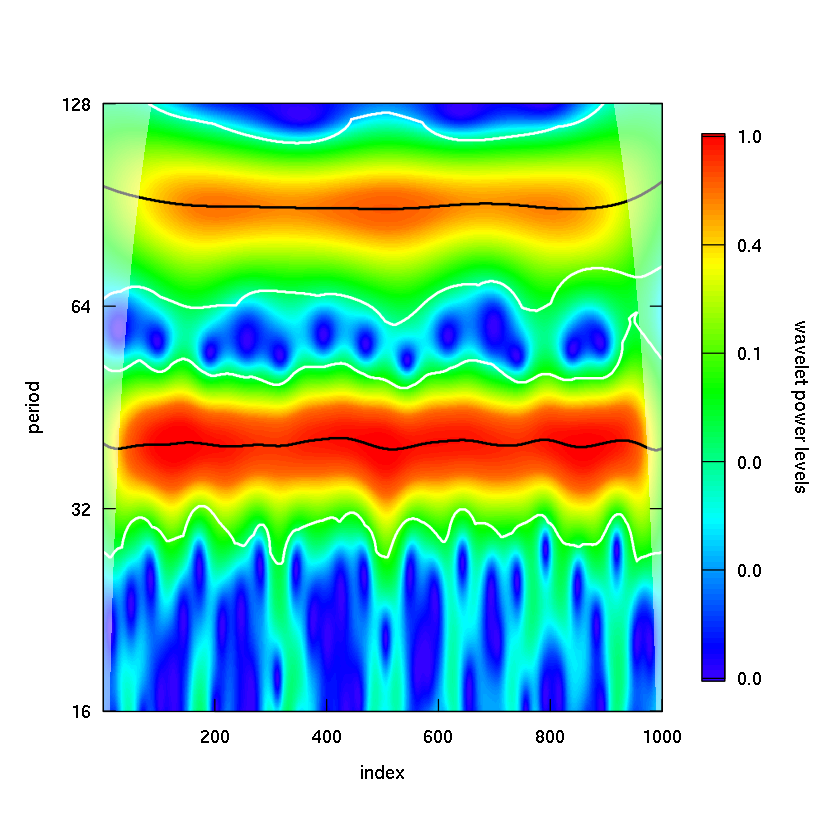

In [11]:
wt.image(my.w.y, n.levels = 100,legend.params = list(lab = "wavelet power levels"))

**One more example**: A series with linearly increasing trend.

Warning message in x + 0.2 * rnorm(1000):
“longer object length is not a multiple of shorter object length”

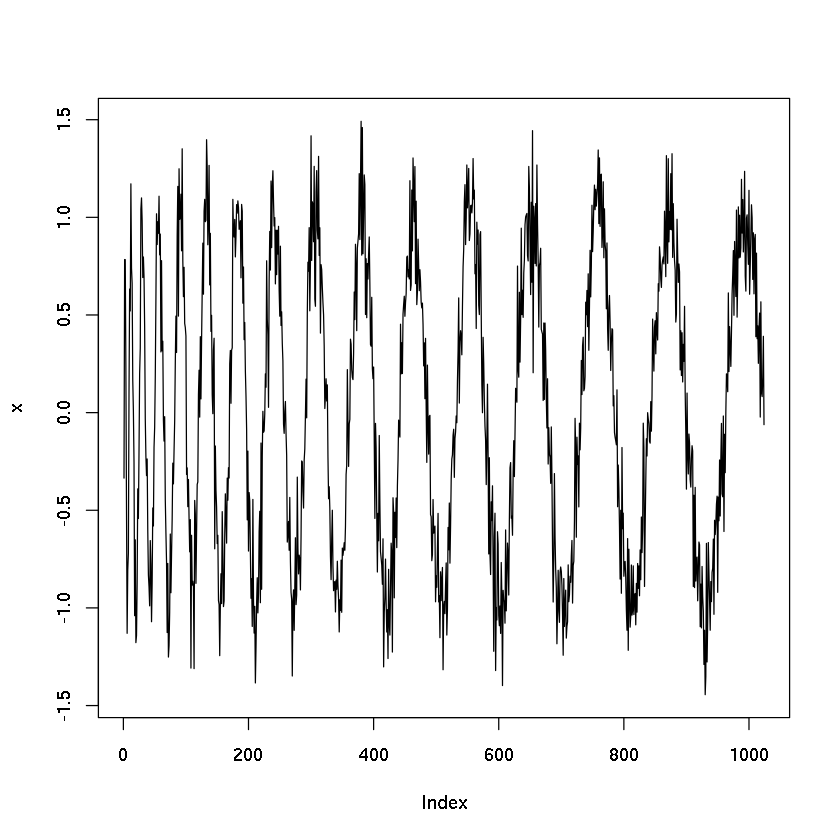

In [12]:
x = periodic.series(start.period = 1, end.period = 128, length = 1024)
x = x + 0.2*rnorm(1000)
plot(x, type="l")

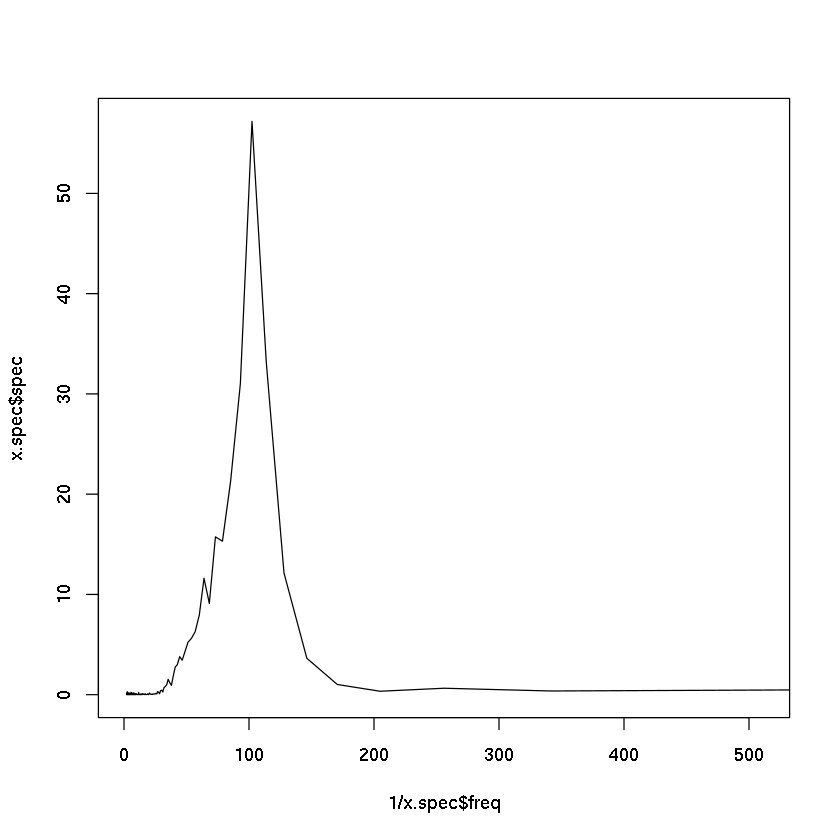

In [13]:
x.spec <- spec.pgram(x, plot = FALSE)
plot(1/x.spec$freq, x.spec$spec, type = "l", xlim=c(0, 512))

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


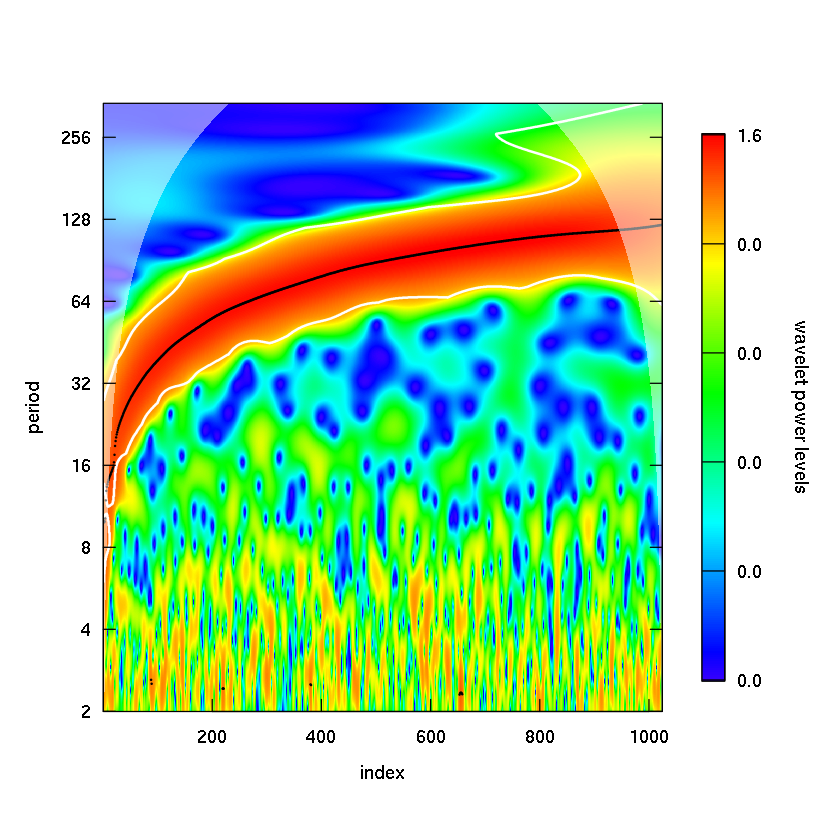

In [14]:
my.data <- data.frame(x = x)
my.w <- analyze.wavelet(my.data, "x",loess.span = 0,dt = 1, dj = 1/250,make.pval = TRUE, n.sim = 10)
wt.image(my.w, n.levels = 250,legend.params = list(lab = "wavelet power levels"))

Wavelets are a good choice, if you want to study periodic phenomena in a time series. Especially, when the frequency changes across time.

Wavelet analysis is being used since the 1980s and finds a broad use in image processing, medicine, geophysics or astronomy. But recently it is also applied to economics.

Not interested in climate research? Maybe just apply what you have learned to other topics such as:

![](https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0195200.g008)

## But how does this work?

In this course we will analyze a time series using the Morlet wavelet. The continous, complex-valued wavelet leads to a continous, complex valued wavelet transform of the time series. We can seperate the wavelet transform into its real part and its imaginary part. Thus, providing information on both, local amplitude and instantaneous phase of any periodic process across time.

The "mother" Morlet wavelet we will use is defined as

$$ \psi (t) = \pi^{-1/4} \exp(i\omega t) \exp(-t^2 /2) $$

with the "angular frequency" $ \omega $ set to 6.

**Task 1**:

    Define the wavelet function mentioned above and seperate its real and imaginary part using

    Re() and Im().

Note: imaginary numbers in `R` are denoted as

```R
imaginary_number <- 1i
```

In [15]:
morlet_wavelet <- function(t){
    return(pi**-0.25 * exp(1i*6*t) * exp(-0.5*t**2))
}

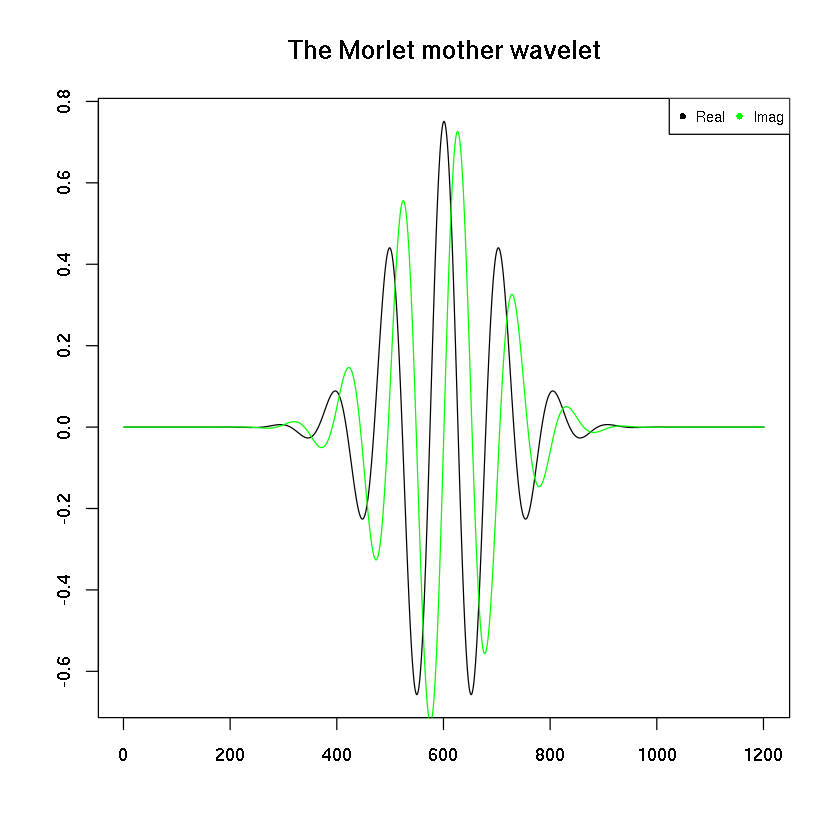

In [16]:
t <- seq(-6,6,0.01)

plot(Re(morlet_wavelet(t)), col="black",xlab="", ylab="", type="l")
par(new=TRUE)
lines(Im(morlet_wavelet(t)), col="green",xlab="", ylab="", lty="solid")
title("The Morlet mother wavelet")
legend("topright",legend=c("Real","Imag"), col = c("black", "green"),
       pch=rep(c(16,18),each=4),ncol=2,cex=0.7,pt.cex=0.7)

The morlet wavelet transform of a time series $x_t$ is defined as the convolution of the series with a set of "wavelet daughters" generated by the mother wavelet, by shifting it in time by $\tau$ and scaling it by $s$.

$$ CWT(\tau , s) = \sum_t x_t \frac{1}{\sqrt(s)} \psi^{*} (\frac{t-\tau}{s}) $$

where * denotes the complex conjugate.

The position of the particular daugher wavelet in the time domain is determined by the localizing time parameter $\tau$ being shift by a time increment of $dt$. The choice of the set of scales $s$ determines the wavelet coverage of the series in the frequncey domain.

In other words:

We move the complex wavelet along the time axis (known as **translation**). We do this multiple times with wavelets of varying frequency. This is known as **scaling**. High scales correspond to low frequencies and a low scale corresponds to high frequencies.

Thus higher frequency wavelets can achieve better localization in time, while low frequency wavelets lose some information in time as they are stretched out. 


![](https://sapienlabs.org/wp-content/uploads/2019/11/wavelet-frequency-time-660x397.png)

Again, try to visualize this stretching. Shown below are frequencies: 1, 5, 10 and 20 Hz.

![](https://sapienlabs.org/wp-content/uploads/2019/11/wavelets-examples.png)

To compute the CWT we would hence need a for loop over all scales and for every timestep. If we use a FFT, we can compute all timesteps per scale at once.

In [18]:
# Morlet wavelet
morlet_wavelet <- function(t){
    return(pi**-0.25 * exp(1i*6*t) * exp(-0.5*t**2))
}

# Fourier transformation of Morlet Wavelet
morlet_wavelet_fft <- function(f){
    wave <- (pi**-0.25) * exp(-0.5 * (f - 6)**2) 
    return(wave)
}

In [19]:
x <- periodic.series(start.period = 1, end.period = 50, length = 1000)
x <- x + 0.2*rnorm(1000)

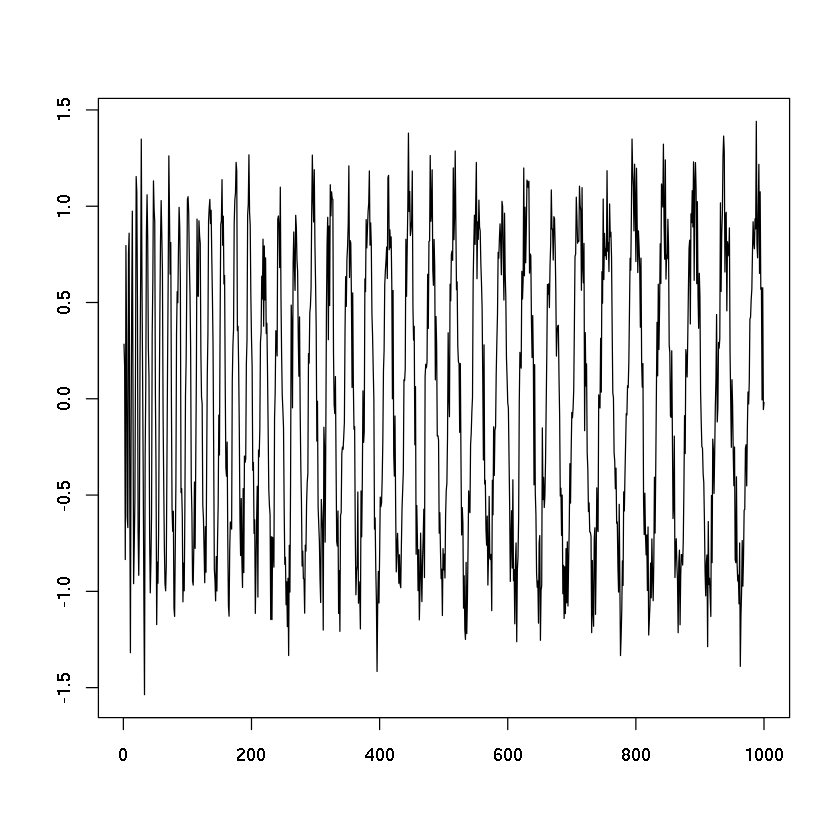

In [20]:
plot(x, col="black",xlab="", ylab="", type="l")

**Task**: Start by computing the fourier transformation of the signal x defined above.

In [21]:
f <- fft(x) # ADD HERE

$$ CWT(\tau , s) = \sum_t x_t \frac{1}{\sqrt(s)} \psi^{*} (\frac{t-\tau}{s}) $$

In [22]:
dt <- 1        # Timestep = 1
dj <- 1/12     # Scales of the wavelet, lower values result in a higher resolution
s0 <- 2*dt     # Minimum scale to be considered

n <- NROW(x)

# FFT frequencies
freq <- 0:(length(f)-1) * 1 / length(f) * 2 * pi

# Scaling of the wavelet 
J1 <- round(log2(n * dt / s0) / dj)
scale <- s0 * 2 ^ ((0:J1) * dj)
wave <- matrix(0, nrow = J1 + 1, ncol = n)

for (a1 in seq_len(J1 + 1)) {
    psi.star = Conj(morlet_wavelet_fft(scale[a1] * freq))
    psi.ft.bar = ((scale[a1] * n)^0.5)* psi.star
    wave[a1, ] <- fft(f * psi.ft.bar, inverse = TRUE)
}

power <- abs(wave)^2

In [23]:
new.data <- aperm(power, c(2,1))

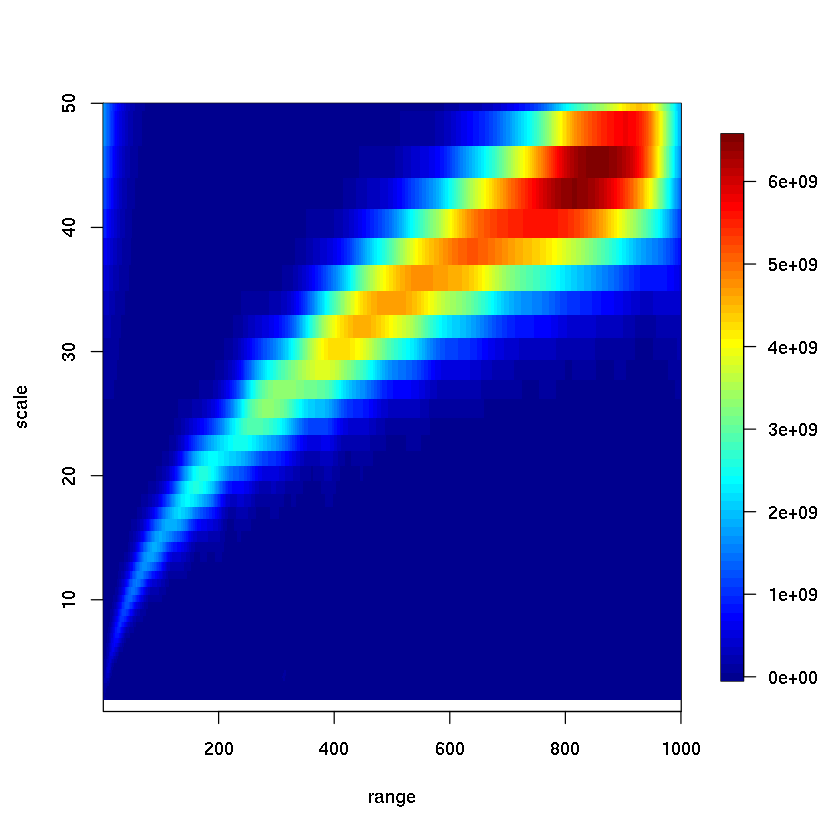

In [24]:
range <- seq(1, length(f), 1)

image.plot(range, scale, new.data, ylim=c(1,50))

Smoothing the time series...
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


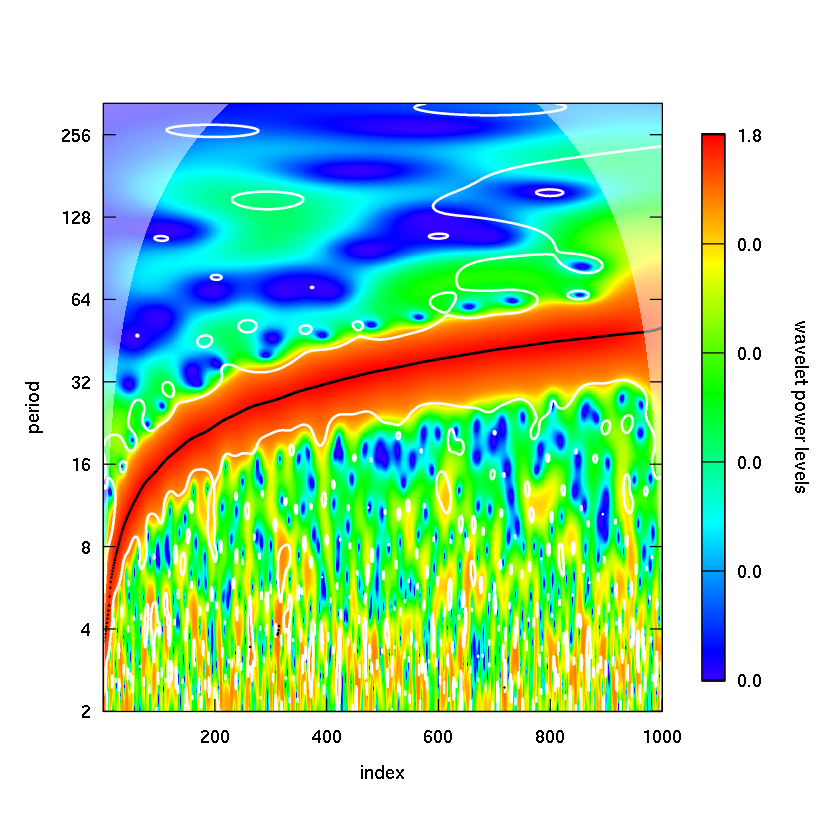

In [25]:
my.data <- data.frame(x = x)
my.w <- analyze.wavelet(my.data, "x", loess.span = 0.75, dt = 1, dj = 1/256, make.pval = TRUE, n.sim = 1)
wt.image(my.w, n.levels = 250, legend.params = list(lab = "wavelet power levels"))

## El Nino Southern Oscillation

In [26]:
sst <- read.table("http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt", header = F, skip = 19)

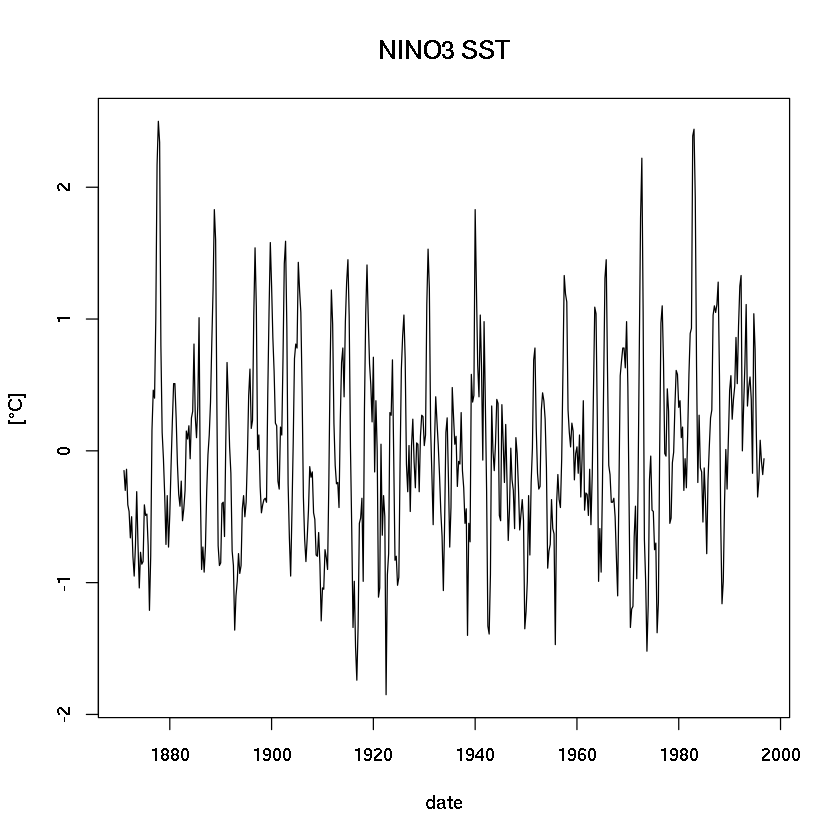

In [27]:
date <- seq(ISOdate(1871,1,1), ISOdate(1996,12,1), by = "quarter")

my.data <- data.frame(x = sst, date = date)
plot(date, my.data$V1, type = "l", ylab="[°C]", main = "NINO3 SST")

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


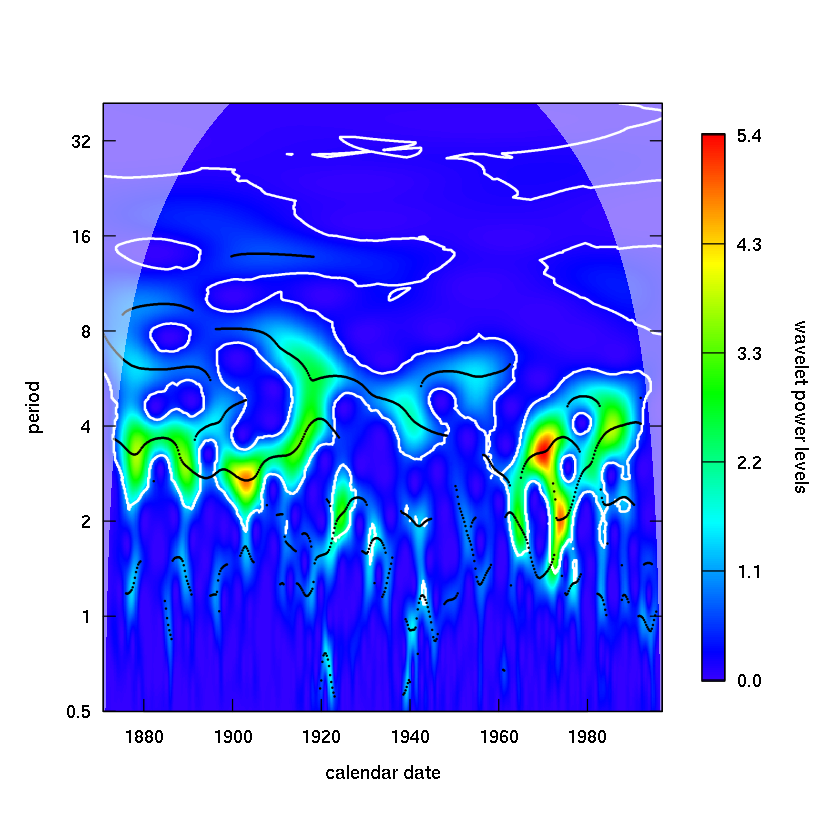

In [28]:
my.w <- analyze.wavelet(my.data, "V1",loess.span = 0,dt = 0.25, dj = 1/250,make.pval = TRUE, n.sim = 30)
wt.image(my.w,color.key="i", n.levels = 250,legend.params = list(lab = "wavelet power levels"), show.date=TRUE)

First, we can see that most of the power is concentrad withing the ENSO band of 2-8 yr band.

With wavelet analysis, one can see variations in the frequency of occurrence and amplitude of El Niño (warm) and La Niña (cold) events. During 1875–1920 and 1960–90 there were many warm and cold events of large amplitude, while during 1920–60 there were few events (Torrence and Webster 1997). From 1875–1910, there was a slight shift from a period near 4 yr to a period closer to 2 yr, while from 1960–90 the shift is from shorter to longer periods.

## Weather and Radiation

In [29]:
data(weather.radiation.Mannheim)
head(weather.radiation.Mannheim)

date,temperature,humidity,radiation
2005-01-01,6.5,90,0.096
2005-01-02,6.6,71,0.095
2005-01-03,4.8,75,0.094
2005-01-04,5.0,80,0.094
2005-01-05,4.5,83,0.097
2005-01-06,7.2,81,0.096


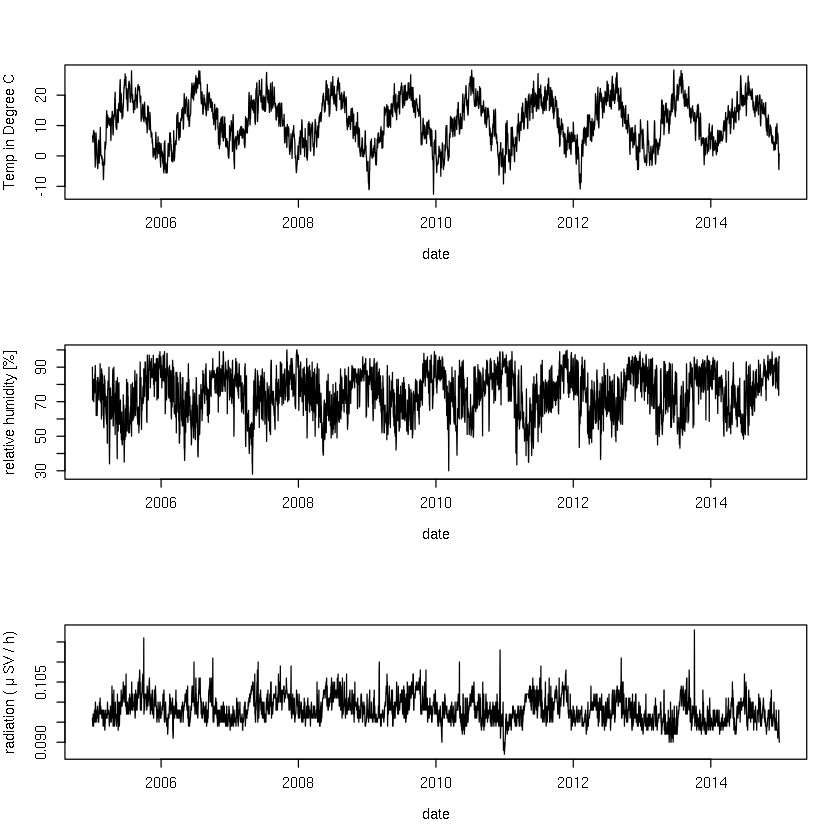

In [30]:
par(mfrow=c(3,1))

date <- as.POSIXct(strptime(weather.radiation.Mannheim$date, format="%Y-%m-%d"))

plot(date, weather.radiation.Mannheim$temperature,
     ylab = "Temp in Degree C", type="l")
plot(date, weather.radiation.Mannheim$humidity,
     type="l", ylab = "relative humidity [%]")
plot(date, weather.radiation.Mannheim$radiation,
     type="l", ylab ="radiation ( µ SV / h)")

For a systematic analysis, we compute the wavelet transform and plot the wavelet power spectrum of each series.

In [31]:
do.wavelet <- function(x, col.name){
    my.w <- analyze.wavelet(x,
                            col.name,
                            loess.span = 0,
                            dt = 1,
                            dj = 1/50,
                            make.pval = TRUE,
                            n.sim = 30)
    
    max.power <- max(my.w$Power)
    wt.image(my.w,
             color.key ="i",
             maximum.level = sqrt(max.power) * 1.001,
             exponent = 0.5,
             n.levels = 250,
             legend.params = list(lab = "wavelet power levels"),
             show.date = TRUE, date.format= "%F", timelab = "")
}

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


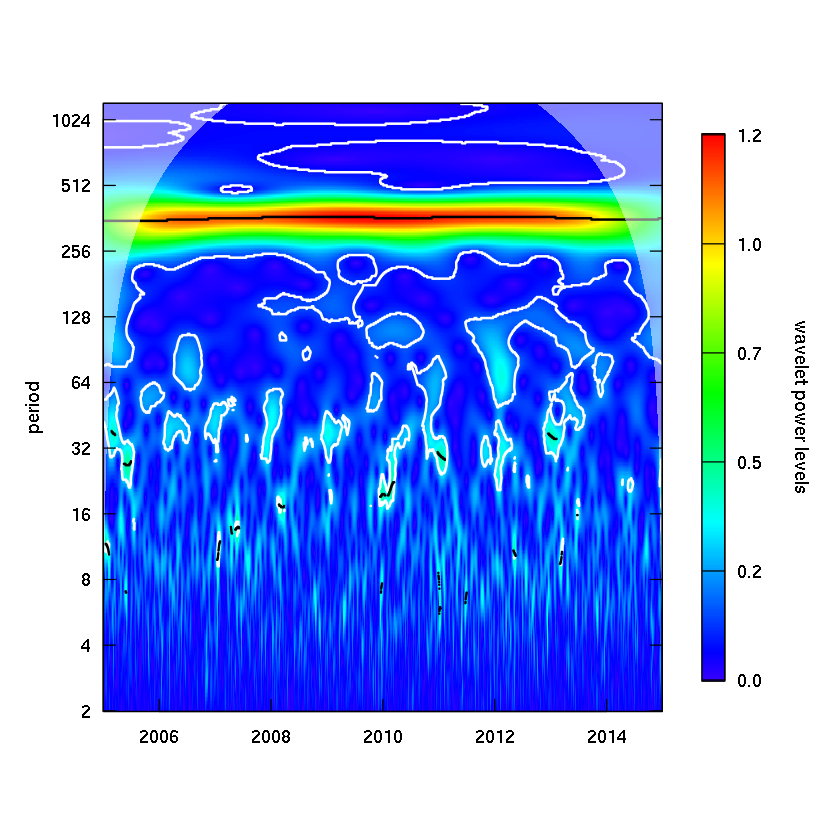

In [32]:
# wavelet for temperature

do.wavelet(weather.radiation.Mannheim, "temperature")

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


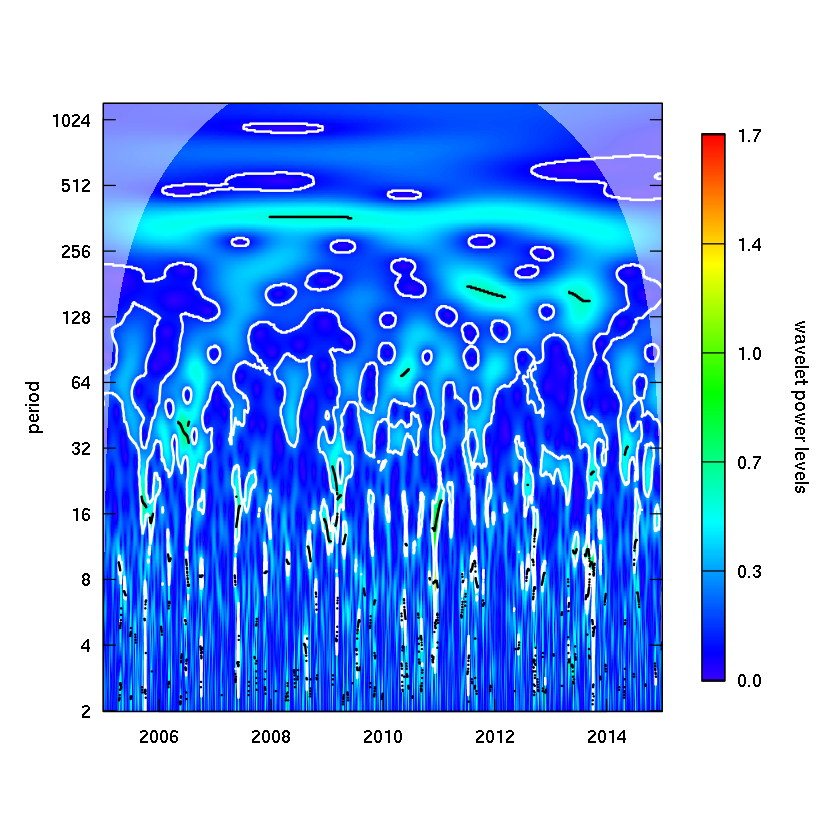

In [33]:
# wavelet for radiation

do.wavelet(weather.radiation.Mannheim, "radiation")

The same settings for the power level range have been used for the three plots, this makes it easier to compare the features of the three series. Indeed, there is a strong 365-day period in the temperature series. To a lesser extent, this is also true for the other two series. Radiation is a more complex phenomenon: many other periods are significant too.

## Cross-wavelet

There are three observations for each day, and we can use cross-wavelet analysis to investigate the periodic linkages between pairs of the three series. To that end, we need a scheme which helps interpret cross-wavelet power spectra.

![](https://www.researchgate.net/profile/Harald-Schmidbauer/publication/323836523/figure/fig2/AS:609191886610433@1522254072580/Phase-differences-and-their-interpretation_W640.jpg)

Each pair from the series temperature, humidity and radiation can be analyzed jointly with respect to its wavelet coherency; this will reveal which series is leading at given time and period (in case of joint significance):

In [34]:
my.wc <- analyze.coherency(weather.radiation.Mannheim,
my.pair = c("temperature", "humidity"),
loess.span = 0,
dt = 1, dj = 1/50,
lowerPeriod = 32, upperPeriod = 1024,
make.pval = TRUE, n.sim = 10)

Starting wavelet transformation and coherency computation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave.xy Angle sWave.xy sAngle Power.xy Power.xy.avg Power.xy.pval Power.xy.avg.pval Coherency Coherence Coherence.avg Coherence.pval Coherence.avg.pval Wave.x Wave.y Phase.x Phase.y Ampl.x Ampl.y Power.x Power.y Power.x.avg Power.y.avg Power.x.pval Power.y.pval Power.x.avg.pval Power.y.avg.pval sPower.x sPower.y Ridge.xy Ridge.co Ridge.x Ridge.y Period Scale nc nr coi.1 coi.2 axis.1 axis.2 date.format date.tz 


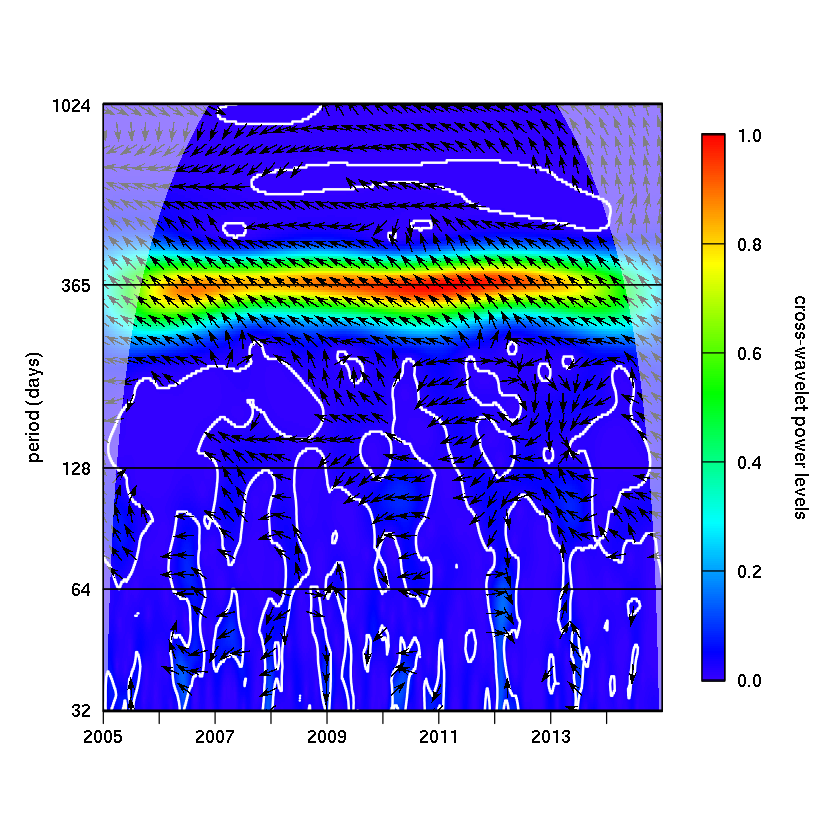

In [35]:
wc.image(my.wc, n.levels = 250,
legend.params = list(lab = "cross-wavelet power levels"),
color.key = "interval",
# time axis:
label.time.axis = TRUE, show.date = TRUE,
spec.time.axis = list(at = paste(2005:2014, "-01-01", sep = ""),
labels = 2005:2014),
timetcl = -0.5, # outward ticks
# period axis:
periodlab = "period (days)",
spec.period.axis = list(at = c(32, 64, 128, 365, 1024)),
periodtck = 1, periodtcl = NULL)

Temperature and humidity are out of phase, with humidity leading by roughly 1/8 year: Humidity
reaches its minimum about 6 to 7 weeks before temperature reaches its maximum.

In the atmosphere the relative humidity of the air is increased, and condensation results when air temperature is reduced to the dew point or when sufficient water vapour is added to saturate the air.